Found 82 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_51770/3302926000.py:69: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(n_qubits_cpu, sim_times_cpu, "ro-", label="Stab-CPU (no parse)", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_51770/3302926000.py:70: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(n_qubits_nvgpu, sim_times_nvgpu, "bs--", label="Stab-GPU (no parse)", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_51770/3302926000.py:71: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(n_qubits_stim

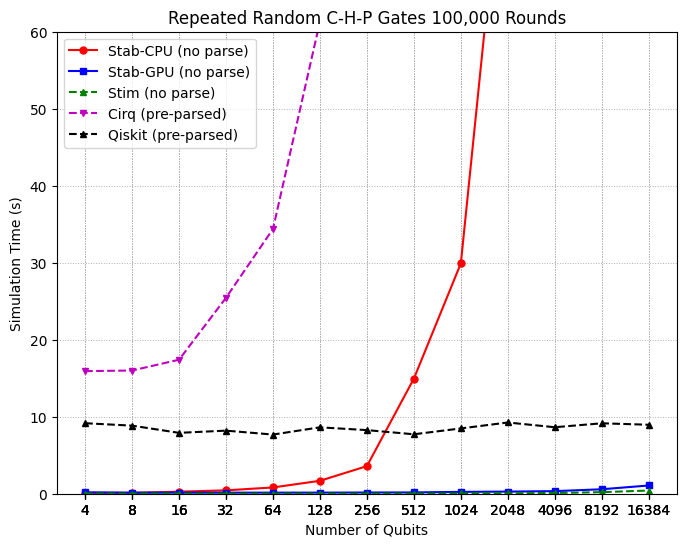

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure stim and cirq are imported
import stim
import cirq

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits", "Scount", "Hcount", "CXcount"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # Process only text files
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_nvgpu = []
    sim_times_cpu = []
    sim_times_stim = []
    sim_times_cirq = []
    sim_times_qiskit = []
    n_qubits_nvgpu = []
    n_qubits_cpu = []
    n_qubits_stim = []
    n_qubits_cirq = []
    n_qubits_qiskit = []

    for data in all_data:
        if data["sim_name"] == "nvgpu":
            n_qubits_nvgpu.append(float(data["n_qubits"]))
            sim_times_nvgpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "cpu":
            n_qubits_cpu.append(float(data["n_qubits"]))
            sim_times_cpu.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            n_qubits_stim.append(float(data["n_qubits"]))
            sim_times_stim.append(float(data["sim_time"]))
        elif data["sim_name"] == "cirq":
            n_qubits_cirq.append(float(data["n_qubits"]))
            sim_times_cirq.append(float(data["sim_time"]))
        elif data["sim_name"] == "qiskit":
            n_qubits_qiskit.append(float(data["n_qubits"]))
            sim_times_qiskit.append(float(data["sim_time"]))


    # Sort the data by number of qubits to ensure smooth line plots
    n_qubits_cpu, sim_times_cpu = zip(*sorted(zip(n_qubits_cpu, sim_times_cpu))) if n_qubits_cpu else ([], [])
    n_qubits_nvgpu, sim_times_nvgpu = zip(*sorted(zip(n_qubits_nvgpu, sim_times_nvgpu))) if n_qubits_nvgpu else ([], [])
    n_qubits_stim, sim_times_stim = zip(*sorted(zip(n_qubits_stim, sim_times_stim))) if n_qubits_stim else ([], [])
    n_qubits_cirq, sim_times_cirq = zip(*sorted(zip(n_qubits_cirq, sim_times_cirq))) if n_qubits_cirq else ([], [])
    n_qubits_qiskit, sim_times_qiskit = zip(*sorted(zip(n_qubits_qiskit, sim_times_qiskit))) if n_qubits_qiskit else ([], [])


    # Plot as line graphs with distinct styles
    plt.figure(figsize=(8, 6))
    plt.plot(n_qubits_cpu, sim_times_cpu, "ro-", label="Stab-CPU (no parse)", linestyle="-", markersize=5)
    plt.plot(n_qubits_nvgpu, sim_times_nvgpu, "bs--", label="Stab-GPU (no parse)", linestyle="-", markersize=5)
    plt.plot(n_qubits_stim, sim_times_stim, "g^-", label="Stim (no parse)", linestyle="--", markersize=5)
    plt.plot(n_qubits_cirq, sim_times_cirq, "mv--", label="Cirq (pre-parsed)", linestyle="--", markersize=5)
    plt.plot(n_qubits_qiskit, sim_times_qiskit, "k^--", label="Qiskit (pre-parsed)", linestyle="--", markersize=5)


    plt.xlabel("Number of Qubits")
    plt.ylabel("Simulation Time (s)")
    plt.xscale("log", base=2)  # Use log scale with base 2 to match x^2 intervals
    plt.ylim(0, 60)
    plt.xticks(n_qubits_cpu + n_qubits_nvgpu + n_qubits_stim + n_qubits_cirq, 
               labels=[f"{int(q)}" for q in n_qubits_cpu + n_qubits_nvgpu + n_qubits_stim + n_qubits_cirq])  # Show exact qubit values
    plt.title("Repeated Random C-H-P Gates 100,000 Rounds")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")
    plt.show()

# Example usage
folder_path = "sim_bench"  # Change this to your actual folder path
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)

Found 82 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_9013/3675695011.py:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(n_qubits_nvgpu2D, sim_times_nvgpu2D, "bs--", label="Stab-GPU", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_9013/3675695011.py:53: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(n_qubits_stim2D, sim_times_stim2D, "g^-", label="Stim", linestyle="--", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_9013/3675695011.py:61: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 20)


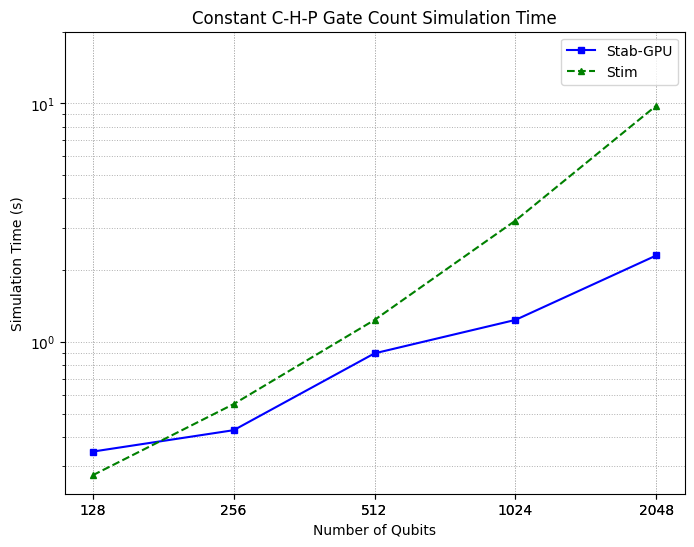

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure stim and cirq are imported
import stim
import cirq

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits", "Scount", "Hcount", "CXcount"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # Process only text files
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_nvgpu2D = []
    sim_times_stim2D = []
    n_qubits_nvgpu2D = []
    n_qubits_stim2D = []

    for data in all_data:
        if data["sim_name"] == "stab2D":
            if (data["n_qubits"] > 64) & (data["n_qubits"] < 4096):
                n_qubits_nvgpu2D.append(float(data["n_qubits"]))
                sim_times_nvgpu2D.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim2D":
            if (data["n_qubits"] > 64) & (data["n_qubits"] < 4096): 
                n_qubits_stim2D.append(float(data["n_qubits"]))
                sim_times_stim2D.append(float(data["sim_time"]))

    # Sort the data by number of qubits to ensure smooth line plots
    n_qubits_nvgpu2D, sim_times_nvgpu2D = zip(*sorted(zip(n_qubits_nvgpu2D, sim_times_nvgpu2D))) if n_qubits_nvgpu2D else ([], [])
    n_qubits_stim2D, sim_times_stim2D = zip(*sorted(zip(n_qubits_stim2D, sim_times_stim2D))) if n_qubits_stim2D else ([], [])


    # Plot as line graphs with distinct styles
    plt.figure(figsize=(8, 6))
    plt.plot(n_qubits_nvgpu2D, sim_times_nvgpu2D, "bs--", label="Stab-GPU", linestyle="-", markersize=5)
    plt.plot(n_qubits_stim2D, sim_times_stim2D, "g^-", label="Stim", linestyle="--", markersize=5)

    plt.xlabel("Number of Qubits")
    plt.ylabel("Simulation Time (s)")
    plt.xscale("log", base=2)  # Use log scale with base 2 to match x^2 intervals
    plt.yscale("log", base=10)  # Use log scale with base 2 to match x^2 intervals


    plt.ylim(0, 20)
    plt.xticks(n_qubits_nvgpu2D + n_qubits_stim2D, 
               labels=[f"{int(q)}" for q in  n_qubits_nvgpu2D + n_qubits_stim2D])  # Show exact qubit values
    plt.title("Constant C-H-P Gate Count Simulation Time")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")
    plt.show()

# Example usage
folder_path = "sim_bench"  # Change this to your actual folder path
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)